In [278]:
import sklearn
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [232]:
df = pd.read_csv('pdb2019trv3_us.csv', encoding='latin-1')
df.head()

,GIDTR,State,State_name,County,County_name,Tract,Flag,Num_BGs_in_Tract,LAND_AREA,AIAN_LAND,...,pct_TEA_MailOutMailBack_CEN_2010,pct_TEA_Update_Leave_CEN_2010,pct_Census_Mail_Returns_CEN_2010,pct_Vacants_CEN_2010,pct_Deletes_CEN_2010,pct_Census_UAA_CEN_2010,pct_Mailback_Count_CEN_2010,pct_FRST_FRMS_CEN_2010,pct_RPLCMNT_FRMS_CEN_2010,pct_BILQ_Mailout_count_CEN_2010
0,1001020100,1,Alabama,1,Autauga County,20100,NaN,2.0,3.788,0.0,...,100.0,NaN,68.25,1.92,0.0,16.39,81.69,61.84,6.40,NaN
1,1001020200,1,Alabama,1,Autauga County,20200,NaN,2.0,1.290,0.0,...,100.0,NaN,68.82,2.28,0.0,13.07,84.65,60.79,8.03,NaN
2,1001020300,1,Alabama,1,Autauga County,20300,NaN,2.0,2.065,0.0,...,100.0,NaN,72.95,1.67,0.0,6.53,91.79,72.95,0.00,NaN
3,1001020400,1,Alabama,1,Autauga County,20400,NaN,4.0,2.464,0.0,...,100.0,NaN,77.64,1.46,0.0,5.51,93.03,77.64,0.00,NaN
4,1001020500,1,Alabama,1,Autauga County,20500,NaN,3.0,4.401,0.0,...,100.0,NaN,70.97,2.16,0.0,5.96,91.87,70.97,0.00,NaN


In [281]:
# https://api.census.gov/data/2018/pdb/tract/variables.html
#list(df.columns)
#df[['Males_CEN_2010','Males_ACS_13_17','Males_ACSMOE_13_17',]].plot(subplots=True, layout=(3, 1), figsize=(10, 20))

In [418]:
"""selected_columns = ['init_return',
                    'County_name',
                    'Neighborhood',
                    'URBANIZED_AREA_POP_CEN_2010',
                    'URBAN_CLUSTER_POP_CEN_2010',
                    'RURAL_POP_CEN_2010',
                    'Tot_Population_CEN_2010',
                    'Males_CEN_2010',
                    'Females_CEN_2010',
                    'Median_Age_ACS_13_17',
                    'Hispanic_CEN_2010',
                    'NH_White_alone_CEN_2010',
                    'NH_Blk_alone_CEN_2010',
                    'NH_AIAN_alone_CEN_2010',
                    'Not_HS_Grad_ACS_13_17',
                    'Born_US_ACS_13_17'
                   ]"""

selected_columns = ["pct_Census_Mail_Returns_CEN_2010"] + list(filter(lambda x: ('ACS_' in x) & ('pct' in x) , df.columns))

tdf = df[selected_columns]
tdf.columns = tdf.columns.map(lambda x: x.split('_ACS')[0])

In [419]:
tdf.head()

,pct_Census_Mail_Returns_CEN_2010,pct_Males,pct_Females,pct_Pop_under_5,pct_Pop_5_17,pct_Pop_18_24,pct_Pop_25_44,pct_Pop_45_64,pct_Pop_65plus,pct_Hispanic,...,pct_Crowd_Occp_U,pct_NO_PH_SRVC,pct_No_Plumb,pct_Recent_Built_HU,pct_MrdCple_w_child,pct_HHD_NoCompDevic,pct_HHD_w_Computer,pct_HHD_w_OnlySPhne,pct_HHD_No_Internet,pct_HHD_w_Broadband
0,68.25,48.73,51.27,4.44,17.99,9.32,24.01,31.27,12.95,2.38,...,0.40,2.65,0.00,0.00,42.04,14.32,72.28,6.63,23.08,65.25
1,68.82,53.73,46.27,3.36,20.03,9.12,29.65,25.78,12.06,1.06,...,0.64,1.15,2.39,0.00,46.58,25.42,64.37,3.45,29.89,57.73
2,72.95,45.29,54.71,3.19,20.56,7.39,28.98,22.60,17.28,8.04,...,2.19,0.70,0.00,0.00,54.79,20.33,67.55,4.30,26.58,58.25
3,77.64,46.89,53.11,5.46,17.23,7.97,20.74,27.54,21.07,9.56,...,0.23,1.60,0.88,0.52,44.73,12.69,76.84,3.37,20.53,70.67
4,70.97,50.72,49.28,5.59,19.78,6.13,29.96,24.27,14.26,0.92,...,0.00,2.07,2.16,0.00,58.08,7.25,85.96,2.34,7.92,81.90


In [420]:
assert(np.all(tdf.dtypes == np.float64))

In [421]:
np.sum(pd.isnull(tdf), axis=0).values / tdf.shape[0]

array([0.01541392, 0.00971307, 0.00971307, 0.00971307, 0.00971307,
       0.00971307, 0.00971307, 0.00971307, 0.00971307, 0.00971307,
       0.00971307, 0.00971307, 0.00971307, 0.00971307, 0.00971307,
       0.00971307, 0.00971307, 0.00971307, 0.00971307, 0.00971307,
       0.00971307, 0.00971307, 0.00971307, 0.00971307, 0.00971307,
       0.00971307, 0.00971307, 0.00971307, 0.00971307, 0.00971307,
       0.00971307, 0.00971307, 0.00982114, 0.00982114, 0.00971307,
       0.0116854 , 0.00971307, 0.00971307, 0.00971307, 0.01125311,
       0.01125311, 0.0167108 , 0.0167108 , 0.01349562, 0.01349562,
       0.01398195, 0.01398195, 0.01117205, 0.00971307, 0.00971307,
       0.00971307, 0.00971307, 0.00971307, 0.00971307, 0.01530585,
       0.01356317, 0.01134767, 0.01529234, 0.03454285, 0.01214471,
       0.01214471, 0.01214471, 0.01214471, 0.01214471, 0.01214471,
       0.01214471, 0.01214471, 0.01214471, 0.01214471, 0.01214471,
       0.01214471, 0.01214471, 0.01214471, 0.01284718, 0.01214

In [422]:
old_size = tdf.shape[0]
tdf = tdf.dropna(axis=0)
1 - tdf.shape[0] / old_size

0.0556441154220253

In [423]:
X, y = tdf.iloc[:, 1:], tdf.iloc[:, 0]
X, X_test, y, y_test = train_test_split(X, y)

In [424]:
X.shape

(52428, 93)

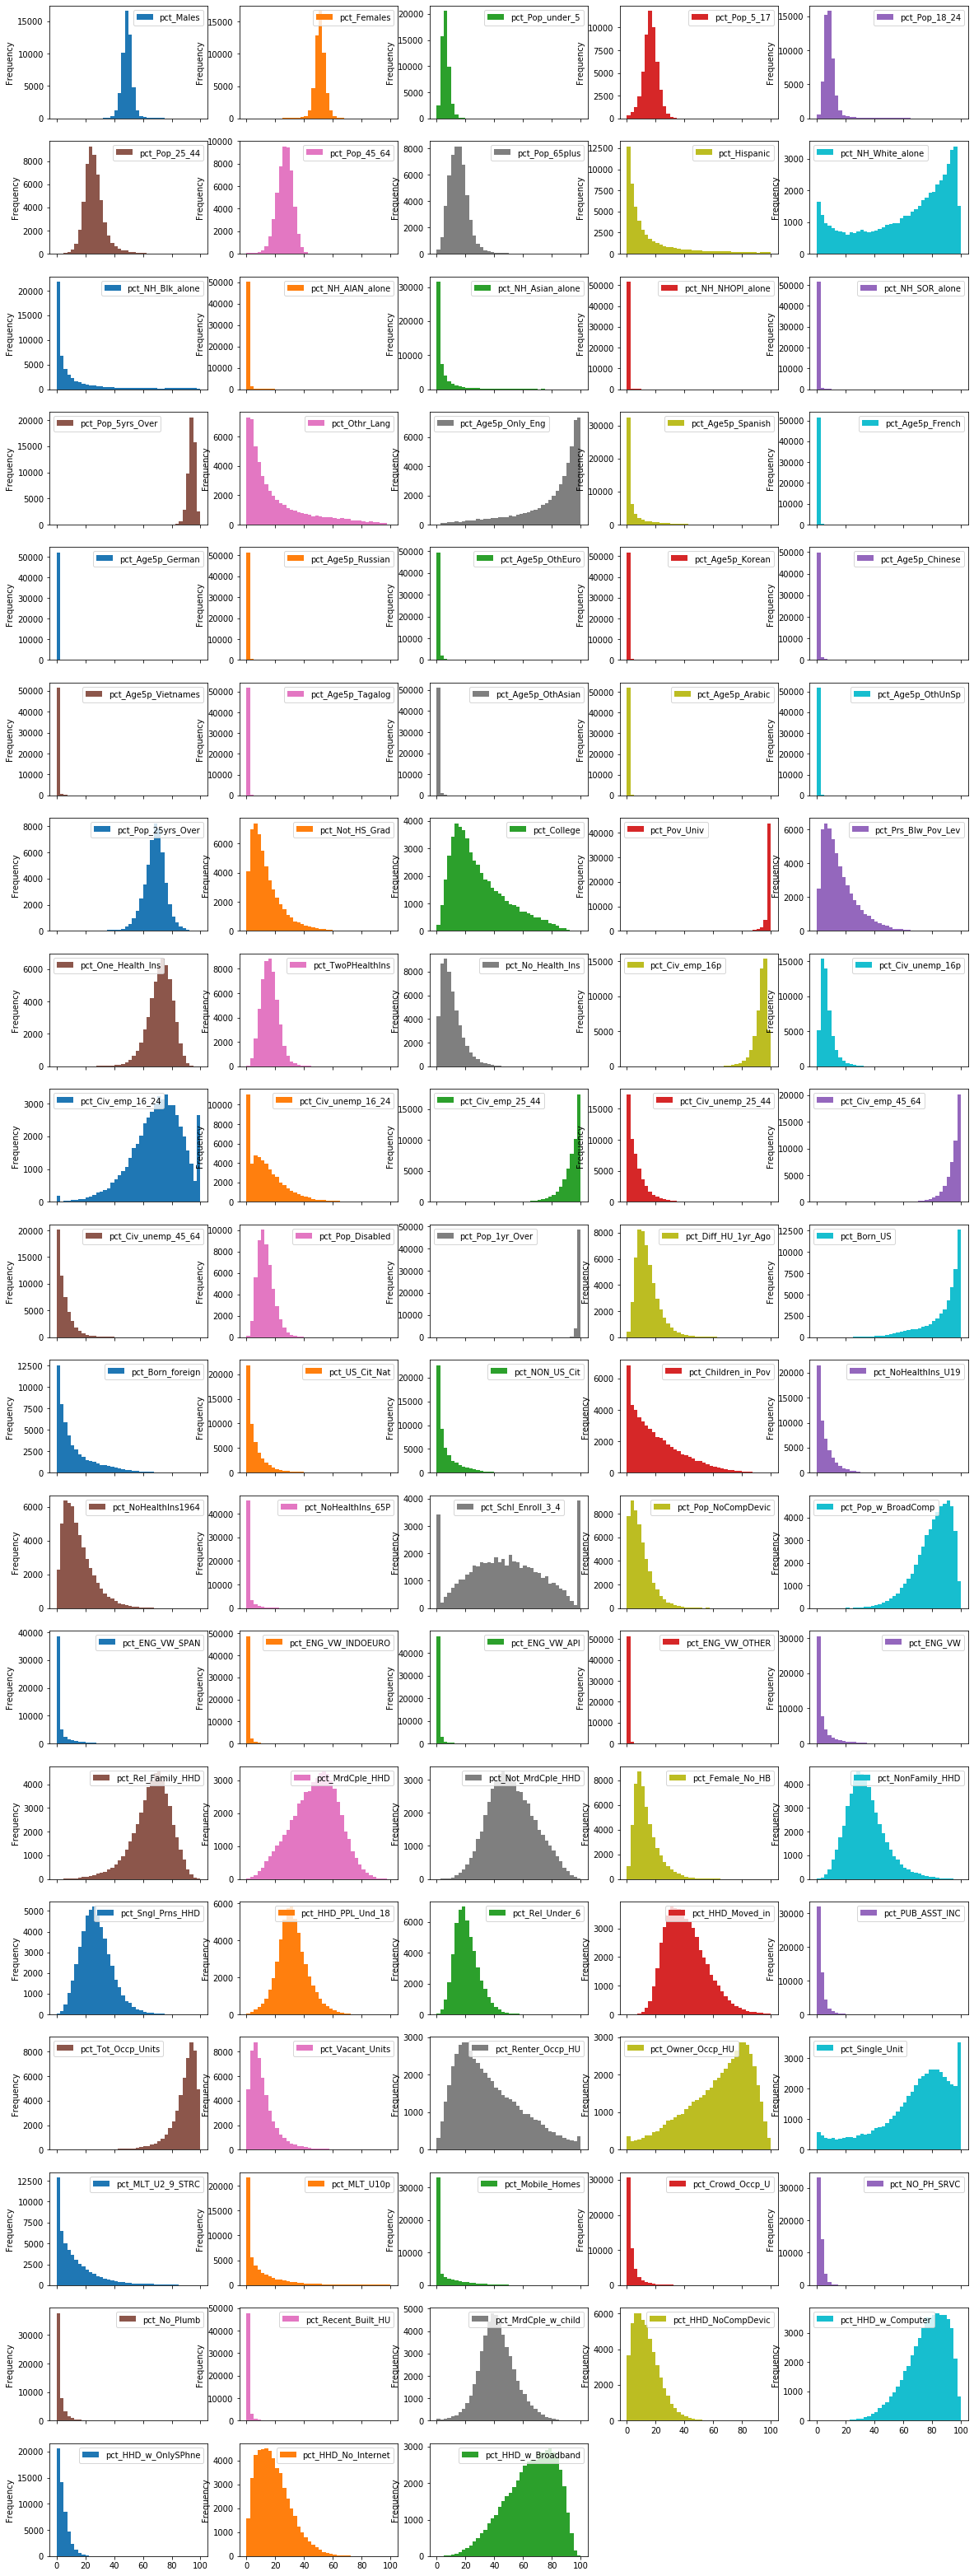

In [425]:
X.iloc[:, :100].plot.hist(subplots=True, bins=40, layout=(20, 5), figsize=(20, 60))
print()

In [449]:
#float_columns = X.dtypes == np.float64
#apply_power_transform = X.var(axis=0) < 1

#pipe = make_pipeline(ColumnTransformer(
#                        [("standardscaler", StandardScaler(), ~apply_power_transform),
#                        ("powertransform", PowerTransformer(), apply_power_transform)],
#                    ),
#                     PCA(),
#                     Lasso())

pipe = make_pipeline(StandardScaler(),
                     PCA(),
                     Lasso())

pipe.fit(X, y)
print()

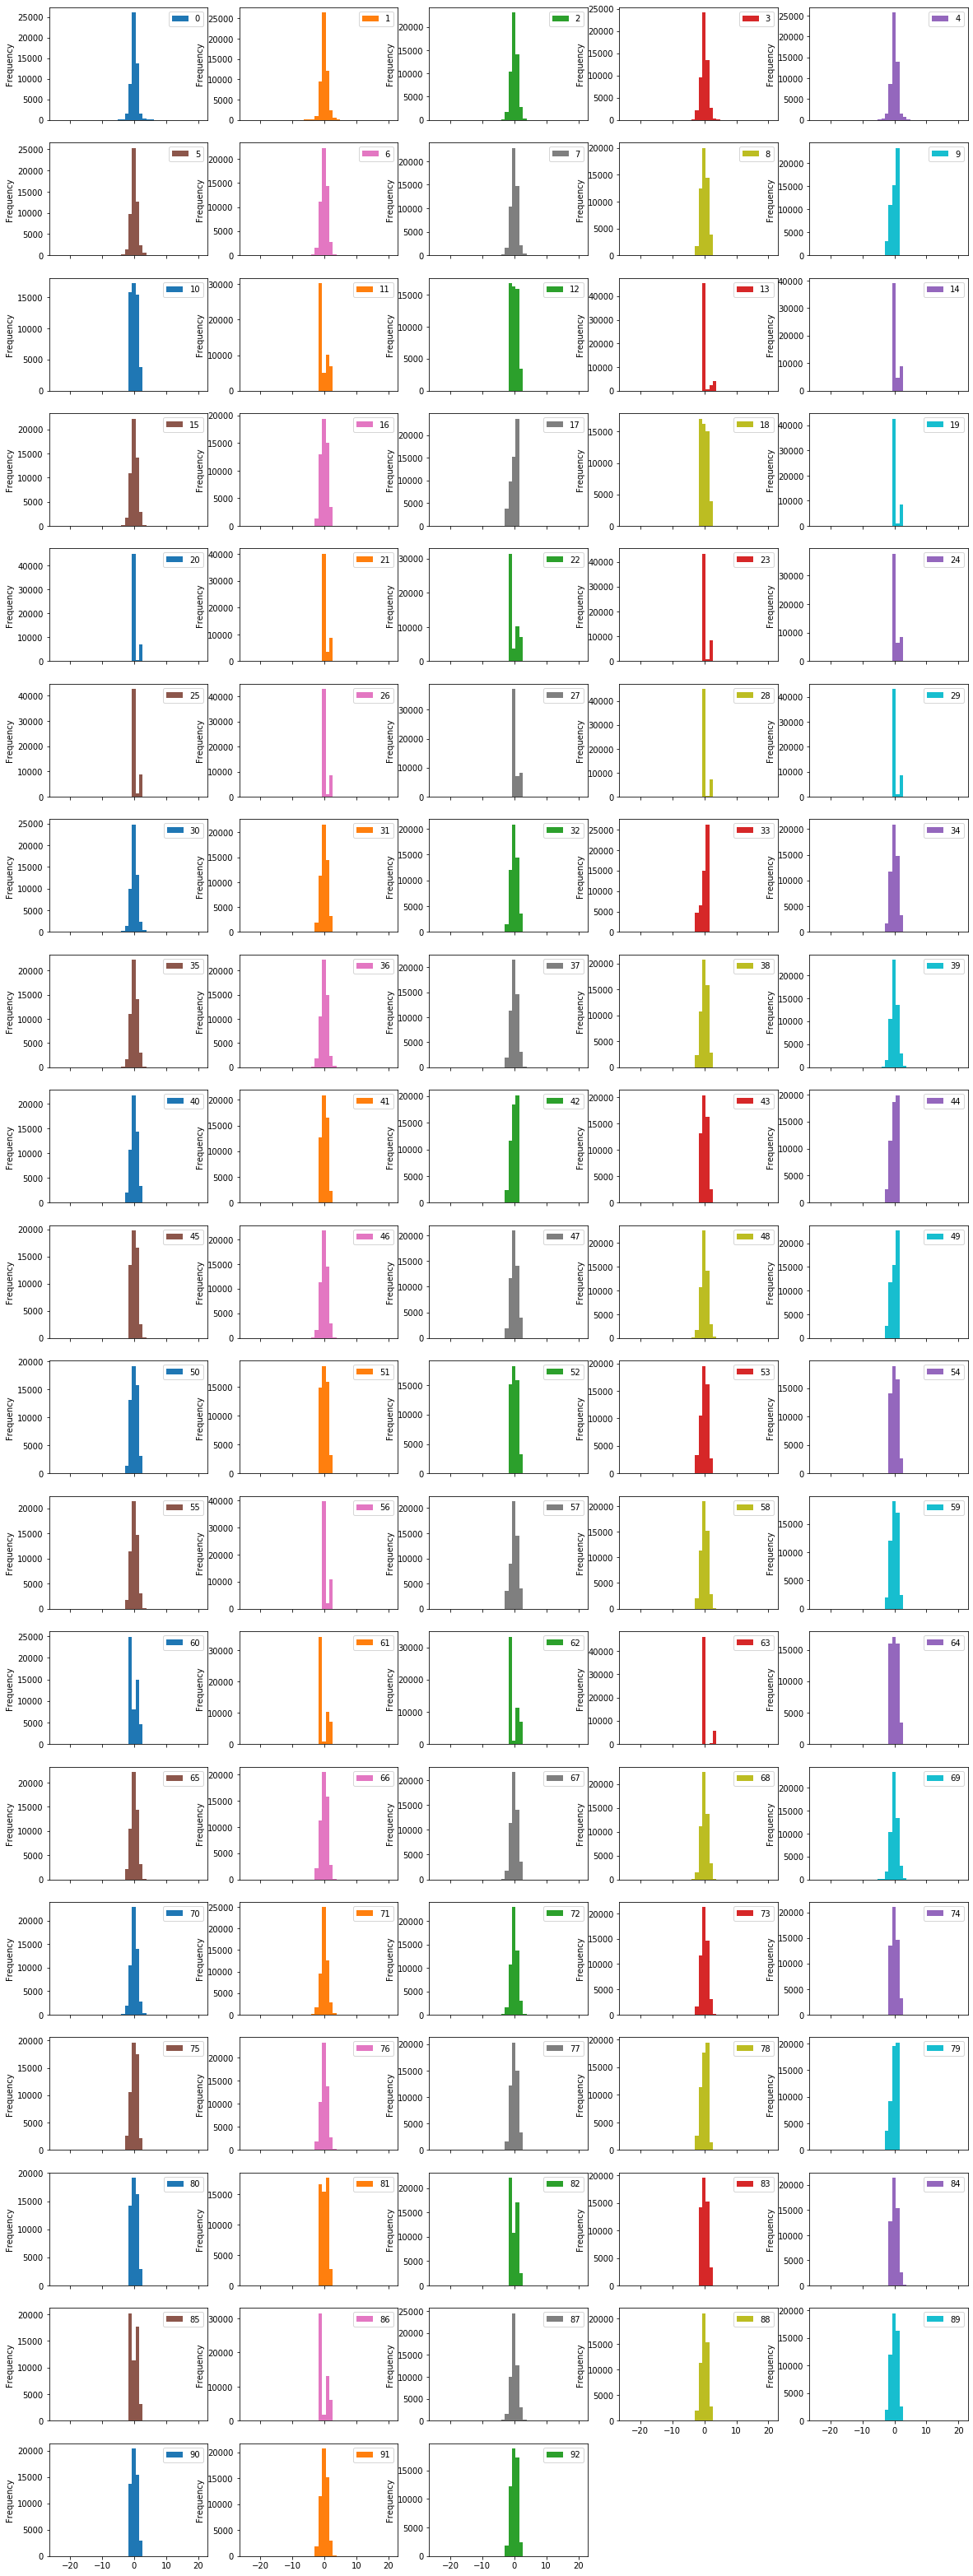

In [450]:
X_transformed = pd.DataFrame(pipe3[:1].transform(X))
X_transformed.plot.hist(subplots=True, bins=40, layout=(20, 5), figsize=(20, 60))
print()

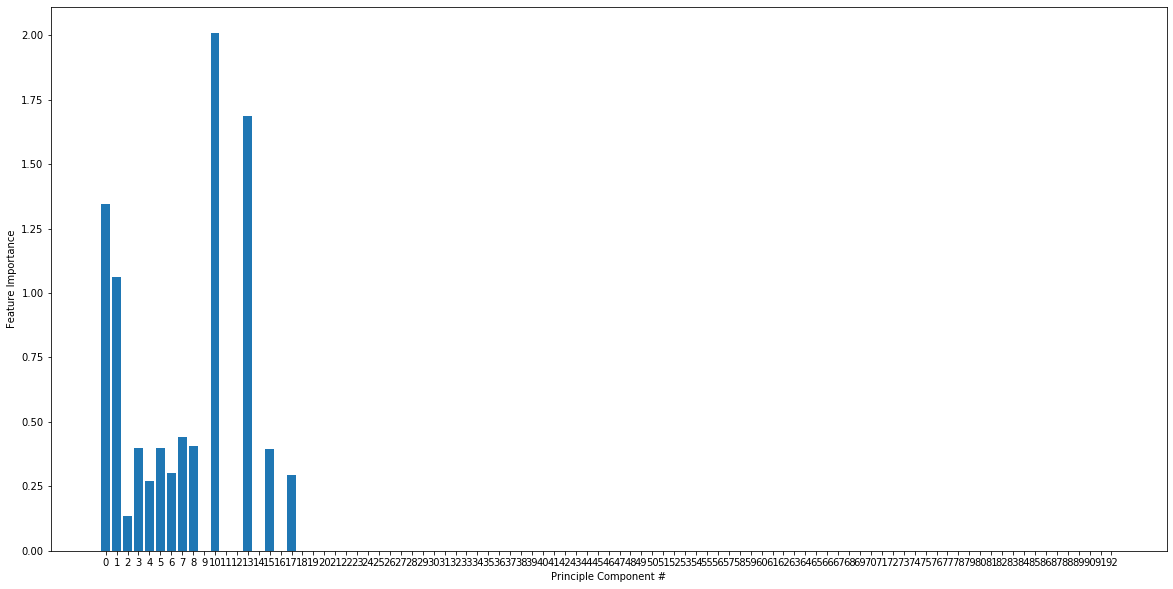

In [451]:
fig, ax = plt.subplots(figsize=(20,10))
coefs = np.abs(pipe.steps[-1][1].coef_)
nonzero_coefs = coefs[0 < coefs]
nonzero_coefs_idxs = np.where(0 < coefs)[0]
#names = X.columns

ax.bar(np.arange(coefs.shape[0]), coefs)
ax.set_xticks(np.arange(len(coefs)))
ax.set_xlabel("Principle Component #")
ax.set_ylabel("Feature Importance")
#ax.set_yticklabels(list(names))
print()

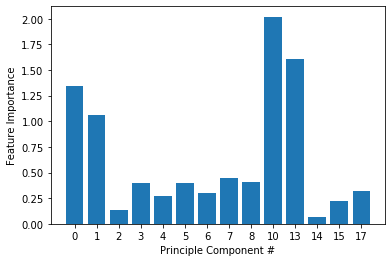

In [444]:
fig, ax = plt.subplots()
ax.bar(np.arange(nonzero_coefs.shape[0]), nonzero_coefs)
ax.set_xticks(np.arange(len(nonzero_coefs)))
ax.set_xlabel("Principle Component #")
ax.set_ylabel("Feature Importance")
ax.set_xticklabels(nonzero_coefs_idxs)
print()

In [446]:
pipe.named_steps['pca'].components_.shape

(20, 93)

[]

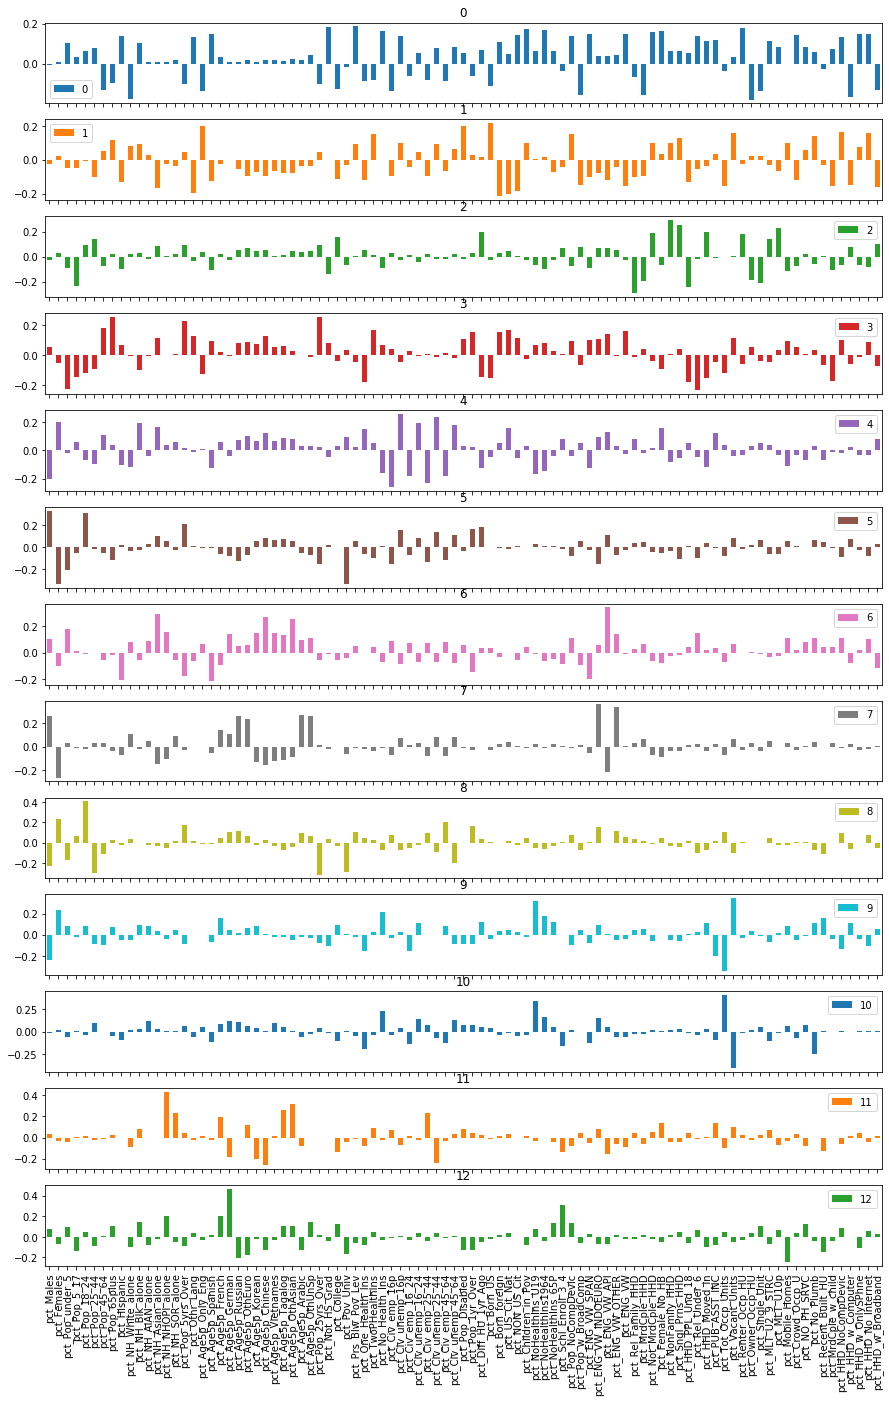

In [480]:

axs = pd.DataFrame(pipe.named_steps['pca'].components_[nonzero_coefs_idxs, :].T).plot(kind='bar', 
                                                               figsize=(15, 30), 
                                                               subplots=True,
                                                               layout=(17, 1),
                                                               )
axs[0, 0].set_xticklabels(X.columns)

In [488]:
np.argsort(np.abs(components), axis=0).shape


(93, 13)

In [499]:
components = pipe.named_steps['pca'].components_[nonzero_coefs_idxs, :].T

for i in range(components.shape[1]):
    print(list(X.columns[ (0.2 < np.abs(components)[:, i])]))
    #print(X.columns[np.argsort(np.abs(components)[:, i])])

[]
['pct_Pop_Disabled', 'pct_Born_US', 'pct_Born_foreign', 'pct_US_Cit_Nat']
['pct_Pop_5_17', 'pct_Rel_Family_HHD', 'pct_NonFamily_HHD', 'pct_Sngl_Prns_HHD', 'pct_HHD_PPL_Und_18', 'pct_Single_Unit', 'pct_MLT_U10p']
['pct_Pop_under_5', 'pct_Pop_65plus', 'pct_Pop_5yrs_Over', 'pct_Pop_25yrs_Over', 'pct_Rel_Under_6']
['pct_Males', 'pct_Females', 'pct_Civ_emp_16p', 'pct_Civ_unemp_16p', 'pct_Civ_emp_25_44', 'pct_Civ_unemp_25_44']
['pct_Males', 'pct_Females', 'pct_Pop_under_5', 'pct_Pop_18_24', 'pct_Pop_5yrs_Over', 'pct_Pov_Univ']
['pct_Hispanic', 'pct_NH_Asian_alone', 'pct_Age5p_Spanish', 'pct_Age5p_Chinese', 'pct_Age5p_OthAsian', 'pct_ENG_VW_SPAN', 'pct_ENG_VW_API']
['pct_Males', 'pct_Females', 'pct_Age5p_Russian', 'pct_Age5p_OthEuro', 'pct_Age5p_Arabic', 'pct_Age5p_OthUnSp', 'pct_ENG_VW_INDOEURO', 'pct_ENG_VW_API', 'pct_ENG_VW_OTHER']
['pct_Males', 'pct_Females', 'pct_Pop_18_24', 'pct_Pop_25_44', 'pct_Pop_25yrs_Over', 'pct_Pov_Univ', 'pct_Civ_emp_45_64', 'pct_Civ_unemp_45_64']
['pct_Males'

In [489]:
np.argsort(np.abs(components), axis=0)

array([[82, 20, 25, ..., 87, 11, 52],
       [21, 31, 13, ..., 13,  8, 89],
       [23, 37, 76, ..., 90, 21,  8],
       ...,
       [77, 51, 70, ..., 54, 26, 82],
       [31, 50, 69, ..., 75, 27, 57],
       [34, 49, 65, ..., 76, 13, 20]])